<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/students_doubts/Projeto_2_RN_corrige.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Projeto 2: Disciplina de Redes Neurais - UFU
# Tema: Processamento de imagens ANN
# Professor: Ubirajara Coutinho Filho
# Aluna: Fernanda Silva Pimenta
# Data: 29/06/2021


In [2]:
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import cv2
import random
import zipfile
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [3]:
!git clone https://github.com/ucfilho/Machine_Learning_DataSet
%cd Machine_Learning_DataSet

fatal: destination path 'Machine_Learning_DataSet' already exists and is not an empty directory.
/content/Machine_Learning_DataSet


In [4]:
# all images are load in variable x...
Arq =['Margaridas.zip','Orquídeas.zip','Rosas.zip']

img_name=[]
x_gray=[]
x_original = []
for FILE in Arq:
  file_name = zipfile.ZipFile(FILE, 'r')
  file_name.extractall()
  with zipfile.ZipFile(FILE, "r") as f:
      for name in f.namelist():
          img_name.append(name)

In [5]:
print(img_name)

['Margarida (1).png', 'Margarida (2).png', 'Margarida (3).png', 'Margarida (4).png', 'Margarida (10).png', 'Margarida (11).png', 'Margarida (12).png', 'Margarida (13).png', 'Margarida (14).png', 'Margarida (15).png', 'Margarida (16).png', 'Margarida (17).png', 'Margarida (18).png', 'Margarida (19).png', 'Margarida (20).png', 'Margarida (21).png', 'Margarida (22).png', 'Margarida (23).png', 'Margarida (24).png', 'Margarida (25).png', 'Margarida (26).png', 'Margarida (27).png', 'Margarida (28).png', 'Margarida (29).png', 'Margarida (30).png', 'Margarida (31).png', 'Margarida (32).png', 'Margarida (33).png', 'Margarida (34).png', 'Margarida (35).png', 'Margarida (36).png', 'Margarida (37).png', 'Margarida (38).png', 'Margarida (39).png', 'Margarida (40).png', 'Margarida (41).png', 'Margarida (42).png', 'Margarida (43).png', 'Margarida (44).png', 'Margarida (100).png', 'Margarida (101).png', 'Margarida (102).png', 'Margarida (103).png', 'Margarida (104).png', 'Margarida (105).png', 'Margar

In [6]:
y_names = []
for yy in img_name:
  name = yy[1]+yy[1]+yy[3]
  y_names.append(name)

In [7]:
unique_list = []    
for yy in y_names:
  if yy not in unique_list:
    unique_list.append(yy)

In [8]:
print(unique_list)

['aag', 'rru', 'ooa']


In [9]:
n = len(unique_list)
y = []
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)

In [10]:
DATASET_SIZE = len(y_names)
Ind = range(DATASET_SIZE)
Img_Size = 80
num_range = DATASET_SIZE

In [11]:
Ind_train, Ind_test= train_test_split(Ind,test_size=0.20, shuffle=True, random_state=3)

In [12]:
X_train = []
Y_train = []
for II in Ind_train:
  name = img_name[II]
  X_train.append(cv2.resize(cv2.imread(name),(Img_Size,Img_Size)))
  # X_train.append(cv2.imread(name))
  Y_train.append(y[II])

In [13]:
X_test= []
Y_test = []
i =0
for II in Ind_test:
  name = img_name[II]
  #X_test.append(cv2.imread(name))
  X_test.append(cv2.resize(cv2.imread(name),(Img_Size,Img_Size)))
  Y_test.append(y[II])

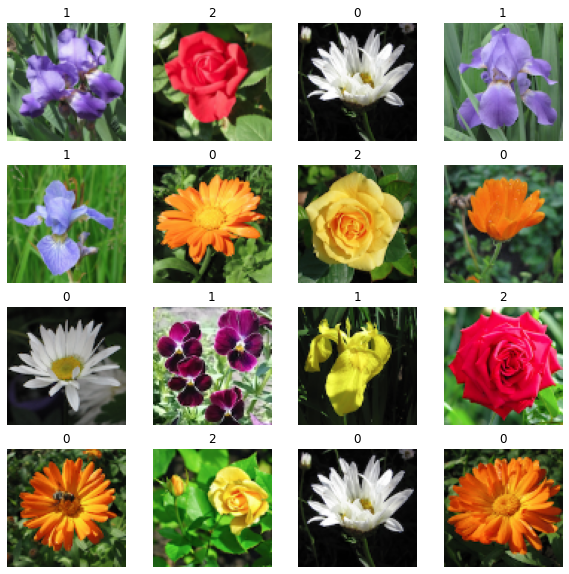

In [14]:
# view some images from the train_ds
# num,cols,dim = np.array(X_train[0]).shape
num = len(Y_train)
plt.figure(figsize=(10, 10))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(num))
  RGB_img = cv2.cvtColor(X_train[kk], cv2.COLOR_BGR2RGB)
  plt.imshow(RGB_img)
  plt.title(Y_train[kk])
  plt.axis("off")

In [15]:
num

124

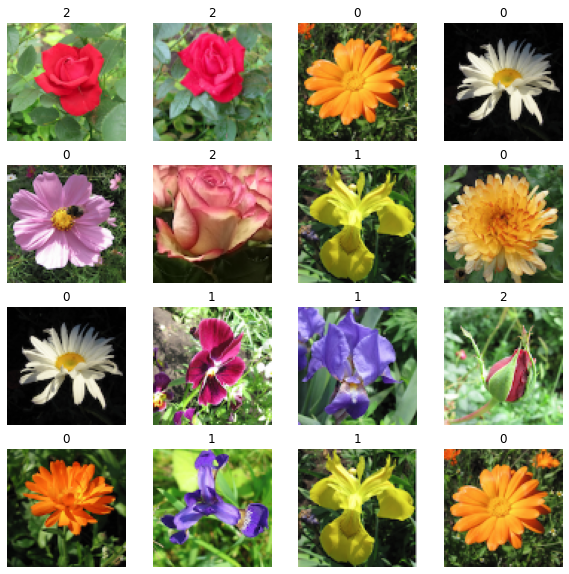

In [16]:
# view some images from the train_ds
# num,- = np.array(X_test).shape
num = len(Y_test)
plt.figure(figsize=(10, 10))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(num))
  RGB_img = cv2.cvtColor(X_test[kk], cv2.COLOR_BGR2RGB)
  plt.imshow(RGB_img)
  plt.title(Y_test[kk])
  plt.axis("off")

In [18]:
X_new = []
for XX in X_train:
  X_new.append(XX)
print(XX)
X_train = X_new.copy()

X_new = []
for XX in X_test:
  X_new.append(XX)

X_test = X_new.copy()

[[[ 23  50  29]
  [ 26  54  32]
  [ 27  53  30]
  ...
  [ 14  22  17]
  [ 15  22  17]
  [ 14  21  16]]

 [[ 23  51  28]
  [ 26  55  30]
  [ 26  52  28]
  ...
  [ 14  21  16]
  [ 15  22  17]
  [ 14  21  16]]

 [[ 23  52  30]
  [ 25  54  30]
  [ 25  51  28]
  ...
  [ 13  19  15]
  [ 14  21  16]
  [ 13  20  15]]

 ...

 [[ 93 182 129]
  [ 79 172 116]
  [ 76 175 115]
  ...
  [ 15  23  17]
  [ 14  21  17]
  [ 14  22  18]]

 [[ 82 177 119]
  [ 81 182 121]
  [ 95 192 133]
  ...
  [  9  12  11]
  [ 10  13  12]
  [ 12  17  15]]

 [[101 195 134]
  [114 203 146]
  [118 205 149]
  ...
  [  8  10  10]
  [  8  10  10]
  [ 10  13  12]]]
[[[ 52  85  68]
  [ 56  75  65]
  [115  97 109]
  ...
  [134 209 168]
  [157 213 185]
  [183 216 196]]

 [[ 75 108  90]
  [ 74  75  83]
  [139 122 130]
  ...
  [234 243 237]
  [237 251 249]
  [245 251 249]]

 [[133 112 133]
  [ 63  18  71]
  [176 183 169]
  ...
  [239 250 246]
  [210 251 248]
  [237 252 250]]

 ...

 [[ 32 154 125]
  [ 28 137 123]
  [ 31 130 142]
  ..

In [19]:
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

In [20]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))
# X_train = X_train.reshape(-1, Img_Size, Img_Size, 3) / 255.0
X_train = X_train /255.0
Y_train = Y_train.astype(np.int32)
#Y_train = Y_train.reshape(1,-1)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
# X_test = X_test.reshape(-1, Img_Size, Img_Size, 3) / 255.0
X_test = X_test /255.0
Y_test = Y_test.astype(np.int32)
#Y_test = Y_test.reshape(1,-1)
Y_test = ynindicator(Y_test)

In [21]:
X_train.shape

(124, 80, 80, 3)

In [22]:
# the model will be a sequence of layers

model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 3), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=200))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=100))
model.add(Activation('relu'))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [23]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=15, batch_size=32)
print("Returned:", r)

Epoch 1/15
4/4 [==============================] - 20s 574ms/step - loss: 3.1313 - accuracy: 0.3546 - val_loss: 1.0679 - val_accuracy: 0.6774
Epoch 2/15
4/4 [==============================] - 1s 311ms/step - loss: 1.2081 - accuracy: 0.6503 - val_loss: 1.0300 - val_accuracy: 0.5161
Epoch 3/15
4/4 [==============================] - 1s 325ms/step - loss: 1.0211 - accuracy: 0.6740 - val_loss: 1.0038 - val_accuracy: 0.7097
Epoch 4/15
4/4 [==============================] - 1s 317ms/step - loss: 0.5388 - accuracy: 0.7470 - val_loss: 0.9640 - val_accuracy: 0.5484
Epoch 5/15
4/4 [==============================] - 1s 313ms/step - loss: 0.3058 - accuracy: 0.8849 - val_loss: 0.9423 - val_accuracy: 0.5484
Epoch 6/15
4/4 [==============================] - 1s 319ms/step - loss: 0.2838 - accuracy: 0.8997 - val_loss: 0.9680 - val_accuracy: 0.4839
Epoch 7/15
4/4 [==============================] - 1s 316ms/step - loss: 0.1690 - accuracy: 0.9388 - val_loss: 0.9932 - val_accuracy: 0.5484
Epoch 8/15
4/4 [===

In [24]:
Img_Size

80

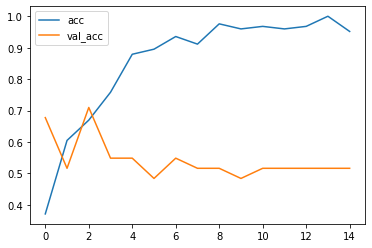

In [25]:
# plot some data
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

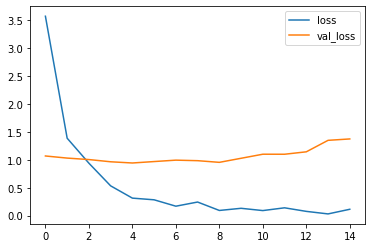

In [26]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()